# A1: Exercise

최규빈  
2025-01-01

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/exercise.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

> 문제풀이에 필요한 모듈은 스스로 `import` 할 것

## `$`. 벡터와 행렬

`(1)`. 아래와 같이 length 5 인 vector를 `torch.tensor`로 선언하는 코드를
작성하라.

$${\bf x} = [1,2,3,4,5]$$

`(풀이)`

In [2]:
x = torch.tensor([1,2,3,4,5])
x

`(2)`. 아래와 같은 2x2 matrix 를 `torch.tensor`로 선언하는 코드를
작성하라.

$${\bf A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

`(3)`. 아래와 같은 matrix 를 `torch.tensor`로 선언하는 코드를 작성하라.

$${\bf W} = \begin{bmatrix} 2.5  \\  4 \end{bmatrix}$$

`(4)`. 아래와 같은 matrix 를 `torch.tensor`로 선언하는 코드를 작성하라.

$${\bf x} = \begin{bmatrix} 2.5  & 4 \end{bmatrix}$$

## `$`. concat, stack

a,b가 아래와 같이 주어졌다고 하자.

In [9]:
a = torch.tensor([1]*10)
b = torch.tensor([2]*10)

아래를 잘 읽고 물음에 답하라.

`(1)`. 주어진 a,b와 `torch.concat`를 이용하여 아래와 같은 배열을
만들어라.

    tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
torch.concat([a.reshape(-1,1), b.reshape(-1,1)])

`(2)`. 주어진 a,b 와 `torch.concat`,`.reshape`를 이용하여 아래와 같은
배열을 만들어라.

    tensor([[1],
            [1],
            [1],
            [1],
            [1],
            [1],
            [1],
            [1],
            [1],
            [1],
            [2],
            [2],
            [2],
            [2],
            [2],
            [2],
            [2],
            [2],
            [2],
            [2]])

`(3)`. 주어진 a,b 와 `torch.concat`,`.reshape`를 이용하여 아래와 같은
배열을 만들어라.

    tensor([[1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2]])

`(4)`. 주어진 a,b와 `torch.stack` 을 이용하여 아래와 같은 배열을
만들어라.

    tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]

`(5)`. 주어진 a,b와 `torch.stack`을 이용하여 아래와 같은 배열을
만들어라.

    tensor([[1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2],
            [1, 2]])

## `$`. 행렬곱

`(1)`. 아래와 같은 텐서를 고려하자.

In [3]:
a = torch.tensor([1,2,3,4,5]).reshape(-1,1)
b = torch.tensor([3,2,1,1,2]).reshape(-1,1)

`@` 연산자를 이용하여 $\sum_{i=1}^{5}a_ib_i$를 계산하라.

`(풀이)`

In [4]:
a.T @ b

`(2)`. 아래와 같은 텐서를 고려하자.

In [6]:
torch.manual_seed(0)
x = torch.randn(100).reshape(-1,1)

`@`연산자를 이용하여 $\sum_{i=1}^{100}x_i^2$을 계산하라.

## `$`. 인덱싱

아래와 같은 배열을 선언하라.

In [23]:
torch.manual_seed(1)
x = torch.randn(12).reshape(3,4)
x

`(1)`. 1열을 추출하는 코드를 작성하라. 즉 결과가 아래와 같이 나오도록
하라.

    tensor([[ 0.6614],
            [-0.4519],
            [-1.0276]])

`(2)`. 2-3열을 추출하는 코드를 작성하라. 즉 결과가 아래와 같이 나오도록
하라.

    tensor([[ 0.2669,  0.0617],
            [-0.1661, -1.5228],
            [-0.5631, -0.8923]])

`(3)`. 2-3행을 추출하는 코드를 작성하라. 즉 결과가 아래와 같이 나오도록
하라.

    tensor([[-0.4519, -0.1661, -1.5228,  0.3817],
            [-1.0276, -0.5631, -0.8923, -0.0583]])

## `$`. 회귀(5obs)

아래와 같은 5개의 자료를 관측하였다고 가정하자.

|     | x   | y    |
|-----|-----|------|
| 0   | 11  | 17.7 |
| 1   | 12  | 18.5 |
| 2   | 13  | 21.2 |
| 3   | 14  | 23.6 |
| 4   | 15  | 24.2 |

$x$에서 $y$로 향하는 규칙을 찾기 위해 아래와 같은 모형을 고려하였다.
($\beta_0, \beta_1$ 대신에 $w_0, w_1$ 이라 생각해도 무방)

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \quad i =1,2,\dots, n$$

`(1)`. $\hat{\beta}_0=3, \hat{\beta}_1=3$ 일 경우의 loss를 계산하라. 단,
손실함수는 MSELoss로 설정한다.

`(2)`. $\hat{\beta}_0=3, \hat{\beta}_1=3$ 에서 손실함수의 미분계수를
계산하라.

`(3)`. 아래의 제약사항을 준수하여 추정값
$\hat{\beta}_0=3, \hat{\beta}_1=3$ 의 값을 1회 update하라.

**제약사항**

1.  `yhat = X@Bhat` 을 만족하는 적당한 `X`, `Bhat`을 선언하여 문제를 풀
    것. (즉 `torch.nn.Linear()` 를 사용하지 말 것)
2.  손실함수는 `torch.nn.MSELoss()`를 사용하지 말고 직접 손실을 구할 것
3.  (확률적)경사하강법을 이용하여 update 하되 직접 수식을 입력할 것. 즉
    `torch.optim.SGD()`를 사용하지 말 것.
4.  학습률은 0.001로 설정할 것

`(4)`. 아래의 제약사항을 준수하여 추정값
$\hat{\beta}_0=3, \hat{\beta}_1=3$ 의 값을 다시 1회 update하라. 결과를
(3)과 비교하라 (동일결과가 나와야함)

**제약사항**

1.  `yhat = net(X)` 을 만족하는 적당한 `X`, `net`을 선언하여 문제를 풀
    것. 이때 `net`는 `torch.nn.Linear(??,??,bias=False)` 를 사용하여
    선언할 것.
2.  손실함수는 `torch.nn.MSELoss()`를 사용하지 말고 직접 손실을 구할 것
3.  (확률적)경사하강법을 이용하여 update 하되 직접 수식을 입력할 것. 즉
    `torch.optim.SGD()`를 사용하지 말 것.
4.  학습률은 0.001로 설정할 것

`(5)`. 아래의 제약사항을 준수하여 추정값
$\hat{\beta}_0=3, \hat{\beta}_1=3$ 의 값을 다시 1회 update하라. 결과를
(3)-(4)와 비교하라 (모두 동일결과가 나와야함)

**제약사항**

1.  `yhat = net(X)` 을 만족하는 적당한 `X`, `net`을 선언하여 문제를 풀
    것. 이때 `net`는 `torch.nn.Linear(??,??,bias=False)` 를 사용하여
    선언할 것.
2.  손실함수는 `torch.nn.MSELoss()`를 사용하지 말고 직접 손실을 구할 것
3.  `torch.optim.SGD()`를 이용하여 update할 것
4.  학습률은 0.001로 설정할 것

`(6)`. 아래의 제약사항을 준수하여 추정값
$\hat{\beta}_0=3, \hat{\beta}_1=3$ 의 값을 다시 1회 update하라. 결과를
(3)-(5)와 비교하라 (모두 동일결과가 나와야함)

**제약사항**

1.  `yhat = net(x)` 을 만족하는 적당한 `x`, `net`을 선언하여 문제를 풀
    것. 이때 `net`는 `torch.nn.Linear(??,??,bias=True)` 를 사용하여
    선언할 것.
2.  손실함수는 `torch.nn.MSELoss()`를 사용하지 말고 직접 손실을 구할 것
3.  (확률적)경사하강법을 이용하여 update 하되 직접 수식을 입력할 것. 즉
    `torch.optim.SGD()`를 사용하지 말 것.
4.  학습률은 0.001로 설정할 것

## `$`. 회귀(2d)

아래의 데이터를 고려하자.

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2025/main/posts/regression_2d.csv")
x1 = torch.tensor(df.x1).float().reshape(-1,1)
x2 = torch.tensor(df.x2).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)

$x_1, x_2$ 에서 $y$로 향하는 규칙을 찾기 위해 아래와 같은 모형을
고려하였다. ($\beta_0,\beta_1,\beta_2$ 대신에 $w_0, w_1, w_2$ 라고
생각해도 무방)

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i \quad i = 1, 2, \ldots, n$$

`(1)`. 아래의 제약사항에 맞추어서 $\beta_0,\beta_1,\beta_2$의 값을
추정하라.

**제약사항**

1.  `yhat = X@Bhat` 을 만족하는 적당한 `X`, `Bhat`을 선언하여 문제를 풀
    것. (즉 `torch.nn.Linear()` 를 사용하지 말 것)
2.  손실함수는 MSE로 설정하되 `torch.nn.MSELoss()`를 사용하지 말고 직접
    손실을 구할 것
3.  (확률적)경사하강법을 이용하여 update 하되 직접 수식을 입력할 것. 즉
    `torch.optim.SGD()`를 사용하지 말 것.

**hint**: 참값은 $\beta_0=2.5, \beta_1=4 , \beta_2= -2$ 임

`(2)`. (1)에서 구한 `X`에 대하여 아래의 수식을 이용하여 직접 추정값을
구하여라.

$$\hat{\boldsymbol \beta}^{LSE} = \begin{bmatrix} \hat{\beta}_0^{LSE} \\  \hat{\beta}_1^{LSE} \\  \hat{\beta}_2^{LSE}\end{bmatrix} = ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y}$$

1에서 추정한 값과 비교하라. 비슷한가?

`(3)`. 이 문제에서 모수의 참값은 $\beta_0=2.5, \beta_1=4 , \beta_2= -2$
이다. `epoch`을 증가할수록 (1)에서 추정된 값은 참값에 근접해갈까?
(`epoch`을 무한대로 하면 결국 참값에 수렴할까?)

`(4)`. 아래의 제약사항에 맞추어서 $\beta_0,\beta_1,\beta_2$의 값을 다시
추정하라.

**제약사항**

1.  `yhat = net(X)` 을 만족하는 적당한 `X`, `net`을 선언하여 문제를 풀
    것. 이때 `net`는 `torch.nn.Linear(??,??,bias=False)` 를 사용하여
    선언할 것.
2.  `torch.nn.MSELoss()`를 이용하여 손실을 구할 것
3.  `torch.optim.SGD()`를 이용하여 update할 것

`(5)`. 아래의 제약사항에 맞추어서 $\beta_0,\beta_1,\beta_2$의 값을 다시
추정하라.

**제약사항**

1.  `yhat = net(X)` 을 만족하는 적당한 `X`, `net`을 선언하여 문제를 풀
    것. 이때 `net`는 `torch.nn.Linear(??,??,bias=True)` 를 사용하여
    선언할 것.
2.  `torch.nn.MSELoss()`를 이용하여 손실을 구할 것
3.  `torch.optim.SGD()`를 이용하여 update할 것

## `$`. 회귀(DL2022-MID-2)

주어진 자료가 아래와 같다고 하자.

In [29]:
torch.manual_seed(7676)
x = torch.randn(100).sort().values
ϵ = torch.randn(100)*0.5
y = 2.5+ 4*x + ϵ

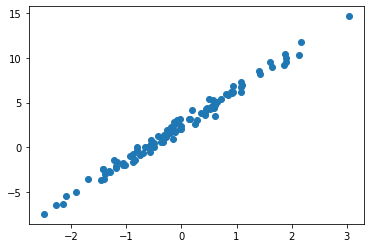

In [8]:
plt.plot(x,y,'o')

아래와 같은 모형을 가정하고 물음에 답하라.

$$y_i = w_0+w_1 x_i +\epsilon_i, \quad \epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$$

`(1)` ??를 적당하게 채워 아래와 같은 네트워크를 설정하고 최초의 예측값이
$\hat{y}_i=-5+10x_i$가 출력되도록 net의 가중치를 조정하라.

``` python
net = torch.nn.Linear(in_features=2,out_features=??,bias=??)
```

`(2)` 학습률은 0.1로 설정하고 torch.optim.Adam을 이용하여 optimizer를
선언하라. $(\hat{w}_0,\hat{w}_1)=(-5,10)$에서 MSELoss의 미분계수
$\frac{\partial}{\partial {\bf W}}loss(w_0,w_1) ~\Big|_{~\hat{w}_0,\hat{w}_1}$를
구하고 이를 바탕으로 $(\hat{w}_0,\hat{w}_1)$의 값을 1회 갱신하라. 계산된
미분계수값과 갱신된 $(\hat{w}_0,\hat{w}_1)$의 값을 출력하라.

`(4)` 학습률을 0.2로 설정하고 torch.optim.SGD를 이용하여 새로운
optimizr를 선언하라. (3)의 결과로 총 5회 갱신된 값에 이어서 10회 추가로
학습하라. 학습된 값은 얼마인가?

`(5)` (4)의 수렴값이 학습이 잘 되었다고 생각하는가? 잘 되었다고 생각하면
그 근거는 무엇인가? (단, $(w_0,w_1)$의 참값은 모른다고 가정한다)

-   hint: 미분값을 근거로 대답할 것

> 이 문제의 경우 풀이가
> <https://guebin.github.io/DL2022/posts/2022-10-28-9wk-1-midsol.html>
> 에 있습니다.